# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [176]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df= pd.merge(study_results, mouse_metadata,how="left")
# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [177]:
# Checking the number of mice.
num_mice=combined_df["Mouse ID"].nunique()
num_mice

249

In [178]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [179]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = combined_df[combined_df['Mouse ID'].isin(duplicate_mice)]
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [180]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.drop_duplicates(subset=['Mouse ID','Timepoint'])
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [181]:
# Checking the number of mice in the clean DataFrame.
clean_mice=clean_df['Mouse ID'].nunique()
clean_mice

249

## Summary Statistics

In [182]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = clean_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_deviation = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
summary_stats_df = pd.DataFrame({
                                'Mean Tumor Volume': mean,
                                'Median Tumor Volume': median,
                                'Tumor Volume Variance': variance,
                                'Tumor Volume Std. Dev.': std_deviation,
                                'Tumor Volume Std. Err.': sem
                                })
summary_stats_df.head(10)

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [183]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
summary_stats_df.describe
# Using the aggregation method, produce the same summary statistics in a single line.
summary_stats = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

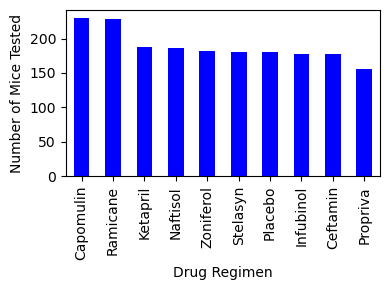

In [184]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
total_num_timepoints=clean_df['Drug Regimen'].value_counts()
df_plot = total_num_timepoints.plot(kind='bar', facecolor='blue', figsize=(4,3))
df_plot.set_xlabel('Drug Regimen')
df_plot.set_ylabel('Number of Mice Tested')
plt.title="Total Number of Timepoints by Drug Regimen"
df_plot.set_xticklabels(total_num_timepoints.index, rotation=90, ha='center')
plt.tight_layout()
plt.show()

TypeError: 'str' object is not callable

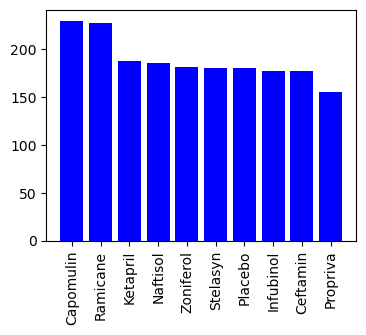

In [191]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
total_num_timepoints = clean_df['Drug Regimen'].value_counts()

plt.figure(figsize=(4, 3))
plt.bar(total_num_timepoints.index, total_num_timepoints.values, color='blue')
plt.xticks(rotation=90, ha='center')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.title('Total Number of Timepoints by Drug Regimen')
plt.show()


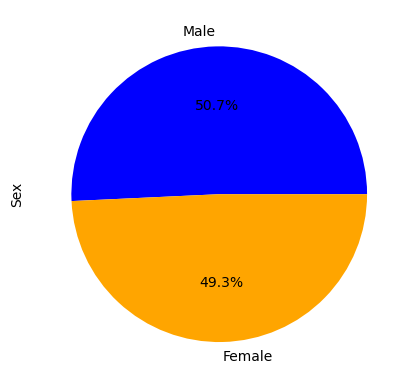

In [198]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = clean_df['Sex'].value_counts()

gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=0, colors=['blue', 'orange'])
plt.title="Distribution of Female vs male"
plt.ylabel="sex"
plt.show()

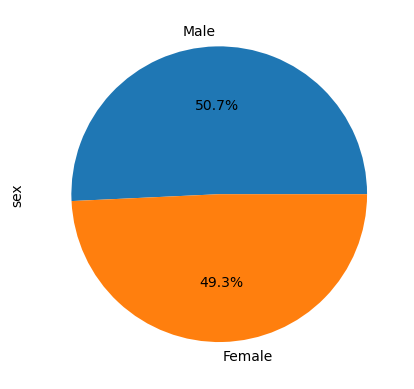

In [196]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
fig, ax = plt.subplots()

ax.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%')

ax.set_ylabel('sex')

plt.show()


## Quartiles, Outliers and Boxplots

In [199]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_regimens_df = clean_df[clean_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = four_regimens_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(last_timepoint_df, four_regimens_df, on=['Mouse ID', 'Timepoint'], how='left')
final_tumor_vol_df = merged_df[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]


In [200]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
for treatment in treatments:   
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
   
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_df = final_tumor_vol_df[final_tumor_vol_df['Drug Regimen'] == treatment]
    tumor_vol_data.append(treatment_df['Tumor Volume (mm3)'].values)
    quartiles = treatment_df['Tumor Volume (mm3)'].quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    #print(f"IQR for {treatment}: {iqr}")
    # Determine outliers using upper and lower bounds
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    #print(f"Lower Bound for {treatment}: {lower_bound}")
    #print(f"Upper Bound for {treatment}: {upper_bound}")
    outliers = treatment_df.loc[(treatment_df['Tumor Volume (mm3)'] < lower_bound) | (treatment_df['Tumor Volume (mm3)'] > upper_bound)]
    print(f"{treatment}'s potential outliers: {outliers['Tumor Volume (mm3)']}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


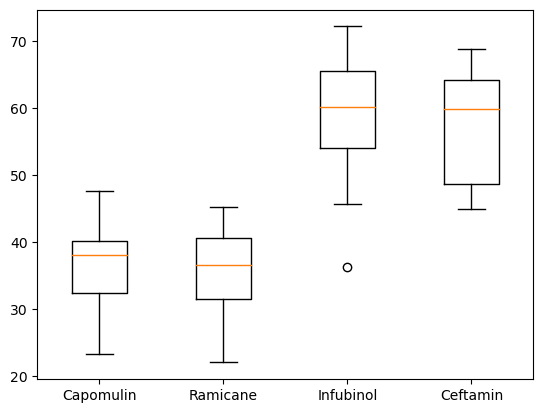

In [228]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
flierprops=dict(marker='o', markerfacecolor='r', markersize=6, markeredgecolor='darkblue')
fig,ax=plt.subplots()
ax.boxplot(tumor_vol_data,labels=treatments)
plt.show()

## Line and Scatter Plots

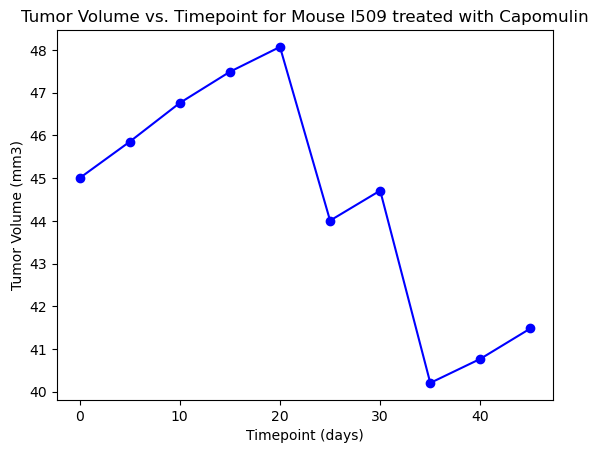

In [219]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_id = 'l509'
capomulin_data = clean_df.loc[(clean_df['Drug Regimen'] == 'Capomulin') & (clean_df['Mouse ID'] == mouse_id)]

# Create the line plot
fig, ax = plt.subplots()
ax.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'], color='blue', marker='o')

# Set the axis labels and title
ax.set_xlabel('Timepoint (days)')
ax.set_ylabel('Tumor Volume (mm3)')
ax.set_title(f'Tumor Volume vs. Timepoint for Mouse {mouse_id} treated with Capomulin')

plt.show()

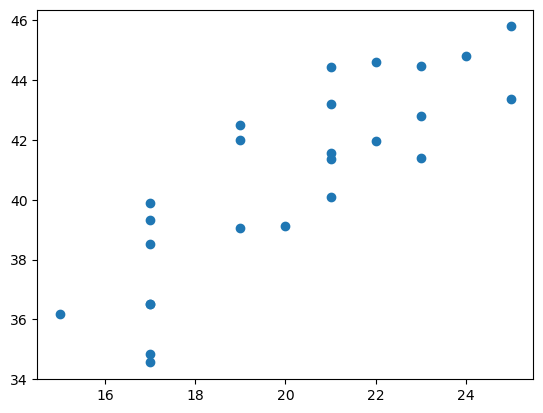

In [220]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_data = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

# Calculate the average 
avg_capomulin_data = capomulin_data.groupby(['Mouse ID']).mean()[['Tumor Volume (mm3)', 'Weight (g)']]

# Create a scatter plot of the data
x_values = avg_capomulin_data['Weight (g)']
y_values = avg_capomulin_data['Tumor Volume (mm3)']
plt.scatter(x_values, y_values)

plt.xlabel="Weight (g)"
plt.ylabel="Average Tumor Volume (mm3)"
plt.title="Average Tumor Volume vs. Mouse Weight for Capomulin Regimen"
plt.show()

## Correlation and Regression

In [224]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
